<a href="https://colab.research.google.com/github/momo1606/Covid-19-Time-series-prediction-dashboard/blob/master/Covid19_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cd ..

/


In [ ]:
df = pd.read_csv('case_time_series.csv')

In [ ]:
df['active']= df['Total Confirmed'] - df['Total Recovered'] - df['Total Deceased']
df['active_per'] = df['active']/df['Total Confirmed'] * 100
#df['growth_tot'] = df['Total Confirmed'][1:].divide(df['Total Confirmed'][:-1])

In [ ]:
l = []
l.append(df['active'][0])
for i in range(1,len(df)):
  l.append(df['active'][i] / df['active'][i-1])
df['growth_active'] = l

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in long_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in long_scalars



In [ ]:
l = []
l.append(df['Total Confirmed'][0])
for i in range(1,len(df)):
  l.append((df['Total Confirmed'][i] / df['Total Confirmed'][i-1]))

df['growth_tot'] = l
#d=df.rolling(7).mean()

In [ ]:

df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
216,02 September,82860,3848981,67874,2967389,913,67250,814342,21.157340,1.017585,1.022001
217,03 September,84156,3933137,67491,3034880,979,68229,830028,21.103460,1.019262,1.021864
218,04 September,87115,4020252,69625,3104505,950,69179,846568,21.057585,1.019927,1.022149
219,05 September,90600,4110852,73161,3177666,916,70095,863091,20.995429,1.019518,1.022536
220,06 September,91723,4202575,69624,3247290,1008,71103,884182,21.039053,1.024437,1.022312


In [ ]:
df.to_csv('a.csv', index= False)

In [ ]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
0,30 January,1,1,0,0,0,0,1,100.0,1.0,1.0
1,31 January,0,1,0,0,0,0,1,100.0,1.0,1.0
2,01 February,0,1,0,0,0,0,1,100.0,1.0,1.0
3,02 February,1,2,0,0,0,0,2,100.0,2.0,2.0
4,03 February,1,3,0,0,0,0,3,100.0,1.5,1.5


In [ ]:
df.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
216,02 September,82860,3848981,67874,2967389,913,67250,814342,21.157340,1.017585,1.022001
217,03 September,84156,3933137,67491,3034880,979,68229,830028,21.103460,1.019262,1.021864
218,04 September,87115,4020252,69625,3104505,950,69179,846568,21.057585,1.019927,1.022149
219,05 September,90600,4110852,73161,3177666,916,70095,863091,20.995429,1.019518,1.022536
220,06 September,91723,4202575,69624,3247290,1008,71103,884182,21.039053,1.024437,1.022312


In [ ]:
de = df[-150:-20]

In [ ]:
de.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
71,10 April,871,7599,151,786,22,249,6564,86.379787,1.118991,1.129459
72,11 April,854,8453,186,972,41,290,7191,85.070389,1.095521,1.112383
73,12 April,758,9211,114,1086,42,332,7793,84.605363,1.083716,1.089672
74,13 April,1243,10454,112,1198,27,359,8897,85.106179,1.141666,1.134947
75,14 April,1031,11485,167,1365,37,396,9724,84.666957,1.092953,1.098623


In [ ]:
de.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
196,13 August,64141,2459626,54776,1750629,1006,48155,660842,26.867581,1.012811,1.026776
197,14 August,65610,2525236,56920,1807549,989,49144,668543,26.474476,1.011653,1.026675
198,15 August,63986,2589222,53116,1860665,952,50096,678461,26.203277,1.014835,1.025339
199,16 August,58096,2647318,57404,1918069,952,51048,678201,25.618418,0.999617,1.022438
200,17 August,54298,2701616,58172,1976241,880,51928,673447,24.927562,0.992990,1.020511


In [ ]:
cap = 2
floor = 1 
d['cap'] = cap
d['floor'] = floor

NameError: ignored

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


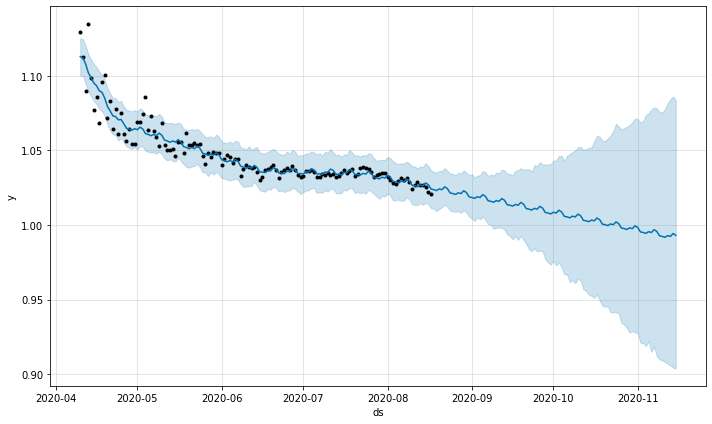

In [ ]:
i = 'growth_tot'
cc  = pd.DataFrame({"ds":pd.date_range(start='4/10/2020', end='8/17/2020'),"y":de[i] },) 
cc.reset_index(inplace=True,drop=True)
# cap = 3
# floor = 1
# cc['cap'] = cap
# cc['floor'] = floor
m = Prophet(interval_width=0.5,growth="logistic",seasonality_mode='additive',daily_seasonality=False,changepoint_range=0.8,n_changepoints=40,mcmc_samples=0)#interval_width=0.1
m = Prophet(interval_width=0.95)
m.fit(cc)
future = m.make_future_dataframe(periods=365)
# future['cap'] = cap
# future['floor'] = floor
forecast = m.predict(future)
path= 'prediction_'+i+'.csv'
forecast.to_csv(path,index=False)
fig1 = m.plot(forecast[:220])

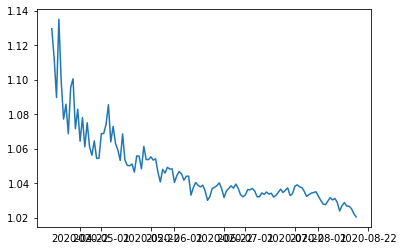

In [ ]:
plt.plot(cc['ds'],cc['y'])

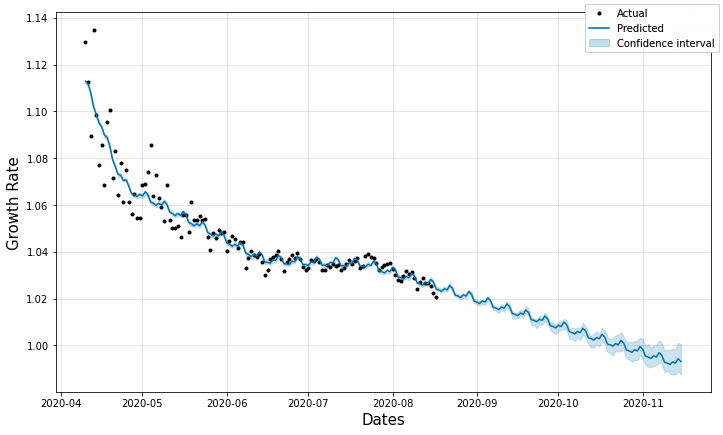

In [ ]:
type(fig1)
fig1.legend(("Actual",'Predicted',"Confidence interval"))
ax = fig1.gca()
ax.set_xlabel("Dates", size=15)
ax.set_ylabel("Growth Rate", size=15)
fig1

In [ ]:
forecast.to_csv("growth forecast.csv")

In [ ]:
forecast[forecast['yhat']<=10000.000].head()[['ds','yhat']]

,ds,yhat
425,2021-06-09,9999.229699
432,2021-06-16,9998.234031
439,2021-06-23,9997.299539
446,2021-06-30,9996.422468
452,2021-07-06,9999.390593


Text(0.5, 1.0, 'Growth Rate Prediction')

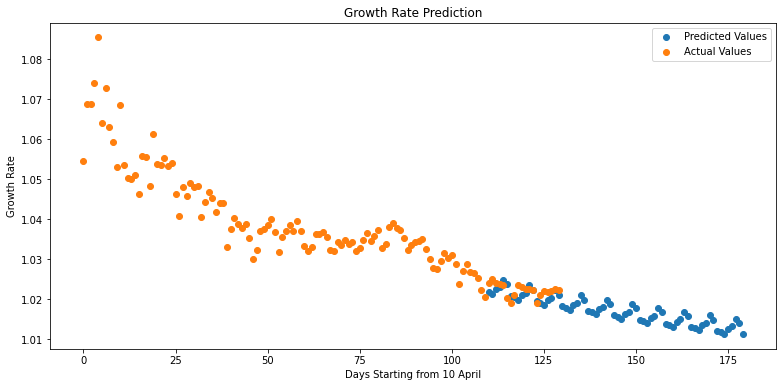

In [ ]:
plt.figure(figsize=(13,6))
plt.scatter(range(110,180),forecast['yhat'][130:200].values,label='Predicted Values')
plt.scatter(range(130),df['growth_tot'][-130:].values,label='Actual Values')
plt.xlabel('Days Starting from 10 April')
plt.ylabel('Growth Rate')
plt.legend()
plt.title('Growth Rate Prediction')

Text(0.5, 1.0, 'Plot of Active Cases per 100 Total Cases')

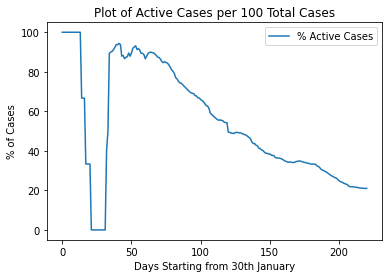

In [ ]:
plt.plot(df['active_per'],label='% Active Cases')
#plt.plot(df['growth_tot'][-130:].values,label='Actual Values')
plt.xlabel('Days Starting from 30th January')
plt.ylabel('% of Cases')
plt.legend()
plt.title('Plot of Active Cases per 100 Total Cases')

In [ ]:
forecast[130:200]

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
130,2020-08-18,1.026290,3,0,1.024868,1.027574,1.026290,1.026290,-0.000110,-0.000110,-0.000110,-0.000110,-0.000110,-0.000110,0.0,0.0,0.0,1.026180
131,2020-08-19,1.025906,3,0,1.024654,1.027223,1.025906,1.025906,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,-0.000006,0.0,0.0,0.0,1.025900
132,2020-08-20,1.025523,3,0,1.024021,1.026694,1.025412,1.025568,-0.000091,-0.000091,-0.000091,-0.000091,-0.000091,-0.000091,0.0,0.0,0.0,1.025432
133,2020-08-21,1.025139,3,0,1.024266,1.027202,1.024823,1.025338,0.000577,0.000577,0.000577,0.000577,0.000577,0.000577,0.0,0.0,0.0,1.025716
134,2020-08-22,1.024756,3,0,1.023241,1.026581,1.024140,1.025225,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.0,0.0,0.0,1.024915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-10-22,1.001503,3,0,0.943022,1.063636,0.943189,1.062821,-0.000091,-0.000091,-0.000091,-0.000091,-0.000091,-0.000091,0.0,0.0,0.0,1.001412
196,2020-10-23,1.001124,3,0,0.943102,1.063842,0.942495,1.063974,0.000577,0.000577,0.000577,0.000577,0.000577,0.000577,0.0,0.0,0.0,1.001701
197,2020-10-24,1.000745,3,0,0.941575,1.065070,0.941370,1.065190,0.000159,0.000159,0.000159,0.000159,0.000159,0.000159,0.0,0.0,0.0,1.000904
198,2020-10-25,1.000366,3,0,0.938863,1.065446,0.939523,1.066404,-0.000252,-0.000252,-0.000252,-0.000252,-0.000252,-0.000252,0.0,0.0,0.0,1.000114


In [ ]:
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [ ]:
dt=pd.read_csv("growth forecast.csv")

In [ ]:
dt.head()

,Unnamed: 0,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-04-10,1.101764,3,0,1.097348,1.106419,1.101764,1.101764,0.000301,0.000301,0.000301,0.000301,0.000301,0.000301,0.0,0.0,0.0,1.102065
1,1,2020-04-11,1.100828,3,0,1.098508,1.107634,1.100828,1.100828,0.002418,0.002418,0.002418,0.002418,0.002418,0.002418,0.0,0.0,0.0,1.103246
2,2,2020-04-12,1.099892,3,0,1.096978,1.106061,1.099892,1.099892,0.001447,0.001447,0.001447,0.001447,0.001447,0.001447,0.0,0.0,0.0,1.101339
3,3,2020-04-13,1.098956,3,0,1.093149,1.102002,1.098956,1.098956,-0.001260,-0.001260,-0.001260,-0.001260,-0.001260,-0.001260,0.0,0.0,0.0,1.097696
4,4,2020-04-14,1.096678,3,0,1.090796,1.100188,1.096678,1.096678,-0.001244,-0.001244,-0.001244,-0.001244,-0.001244,-0.001244,0.0,0.0,0.0,1.095434


In [ ]:
dt[dt['yhat']<1.000].head()[['ds','yhat']]

,ds,yhat
206,2020-11-02,0.999106
207,2020-11-03,0.998796
208,2020-11-04,0.998141
209,2020-11-05,0.999295
210,2020-11-06,0.999360


In [ ]:
from sklearn import metrics as m
import numpy as np
print(m.mean_squared_error(df['growth_tot'][-20:].values,forecast['yhat'][130:150].values)) #Active percentage r2 scorefrom sklearn import metrics as m
#print(m.r2_score(df['growth_tot'][-20:].values,forecast['yhat'][130:150].values)) #Active percentage r2 scorefrom sklearn import metrics as m
print(np.sqrt(m.mean_squared_error(df['growth_tot'][-20:].values,forecast['yhat'][130:150].values))) #Active percentage r2 scorefrom sklearn import metrics as m


402.095628902133
20.05232228202342


Moving average

In [ ]:
N = 7
cumsum, moving_aves = [0], []

for i, x in enumerate(l, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

# Extra Part
---

In [ ]:
cc  = pd.DataFrame({"ds":pd.date_range(start='4/10/2020', end='9/6/2020'),"y":d['Cases'] },)

KeyError: ignored

In [ ]:
cc.reset_index(inplace=True,drop=True)
cc.head()

,ds,y
0,2020-04-10,1.129459
1,2020-04-11,1.112383
2,2020-04-12,1.089672
3,2020-04-13,1.134947
4,2020-04-14,1.098623


In [ ]:
m = Prophet(interval_width=0.1)
m.fit(cc)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)

In [ ]:
forecast = m.predict(future)

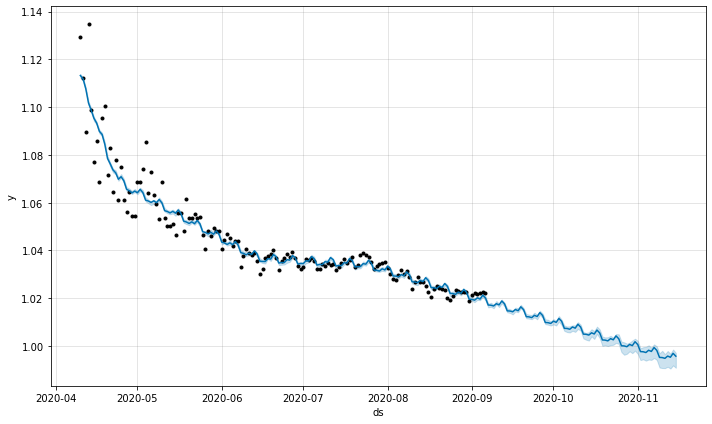

In [ ]:
fig1 = m.plot(forecast[:220])

In [ ]:
forecast[100:150]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
100,2020-07-19,1.034500,1.028060,1.043119,1.034500,1.034500,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,1.035719
101,2020-07-20,1.034441,1.025438,1.040390,1.034441,1.034441,-0.001383,-0.001383,-0.001383,-0.001383,-0.001383,-0.001383,0.0,0.0,0.0,1.033058
102,2020-07-21,1.034381,1.026234,1.041223,1.034381,1.034381,-0.001104,-0.001104,-0.001104,-0.001104,-0.001104,-0.001104,0.0,0.0,0.0,1.033276
103,2020-07-22,1.034321,1.025887,1.041115,1.034321,1.034321,-0.001075,-0.001075,-0.001075,-0.001075,-0.001075,-0.001075,0.0,0.0,0.0,1.033245
104,2020-07-23,1.034261,1.026803,1.041681,1.034261,1.034261,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217,0.0,0.0,0.0,1.034477
105,2020-07-24,1.034201,1.026650,1.041991,1.034201,1.034201,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.0,0.0,0.0,1.034276
106,2020-07-25,1.033853,1.028353,1.043446,1.033853,1.033853,0.002051,0.002051,0.002051,0.002051,0.002051,0.002051,0.0,0.0,0.0,1.035904
107,2020-07-26,1.033505,1.027186,1.042162,1.033505,1.033505,0.001219,0.001219,0.001219,0.001219,0.001219,0.001219,0.0,0.0,0.0,1.034724
108,2020-07-27,1.033157,1.023885,1.038991,1.033157,1.033157,-0.001383,-0.001383,-0.001383,-0.001383,-0.001383,-0.001383,0.0,0.0,0.0,1.031775
109,2020-07-28,1.032809,1.023870,1.039636,1.032809,1.032809,-0.001104,-0.001104,-0.001104,-0.001104,-0.001104,-0.001104,0.0,0.0,0.0,1.031705


In [ ]:
forecast[forecast['yhat']>=1.0000000000].tail()[["ds","yhat"]]

,ds,yhat
200,2020-10-27,1.000045
202,2020-10-29,1.000670
203,2020-10-30,1.000181
204,2020-10-31,1.001809
205,2020-11-01,1.000629


In [ ]:
forecast[forecast['yhat']<=1.0000000].head()[["ds","yhat"]]

,ds,yhat
201,2020-10-28,0.999726
206,2020-11-02,0.997679
207,2020-11-03,0.997610
208,2020-11-04,0.997291
209,2020-11-05,0.998235


In [ ]:
forecast.to_csv('growth_rate_prediction.csv',index=False)

In [ ]:
dd  = pd.DataFrame({"ds":pd.date_range(start='4/10/2020', end='9/6/2020'),"y":x[-150:] },)

In [ ]:
m1 = Prophet()
m1.fit(dd)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future1 = m1.make_future_dataframe(periods=365)

In [ ]:
forecast1 = m.predict(future1)

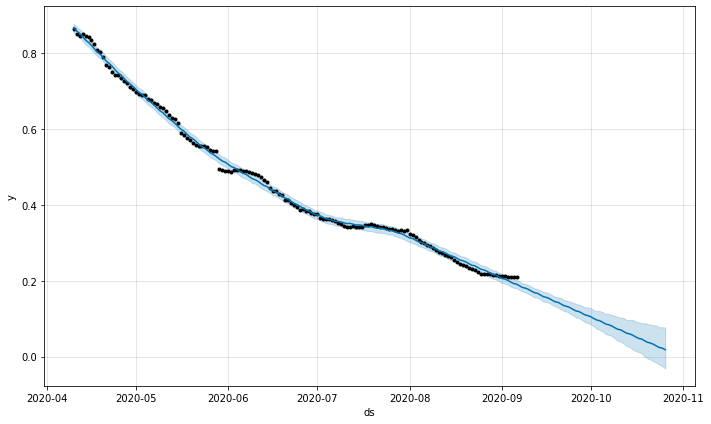

In [ ]:
fig2 = m1.plot(forecast1[:200])

In [ ]:
forecast[forecast['yhat']>=0.0000000000].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
200,2020-10-27,0.014780,-0.037935,0.065586,-0.037300,0.064673,-0.001042,-0.001042,-0.001042,-0.001042,-0.001042,-0.001042,0.0,0.0,0.0,0.013738
201,2020-10-28,0.011337,-0.044286,0.064968,-0.042639,0.062998,0.000569,0.000569,0.000569,0.000569,0.000569,0.000569,0.0,0.0,0.0,0.011905
202,2020-10-29,0.007894,-0.048074,0.065306,-0.048158,0.061072,0.000819,0.000819,0.000819,0.000819,0.000819,0.000819,0.0,0.0,0.0,0.008712
203,2020-10-30,0.004451,-0.052399,0.060103,-0.052912,0.059387,-0.000360,-0.000360,-0.000360,-0.000360,-0.000360,-0.000360,0.0,0.0,0.0,0.004090
204,2020-10-31,0.001008,-0.057744,0.057856,-0.057928,0.057486,-0.000917,-0.000917,-0.000917,-0.000917,-0.000917,-0.000917,0.0,0.0,0.0,0.000091


In [ ]:
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
0,30 January,1,1,0,0,0,0,1,100.0,1.0,1.0
1,31 January,0,1,0,0,0,0,1,100.0,1.0,1.0
2,01 February,0,1,0,0,0,0,1,100.0,1.0,1.0
3,02 February,1,2,0,0,0,0,2,100.0,2.0,2.0
4,03 February,1,3,0,0,0,0,3,100.0,1.5,1.5
